In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv("Dataste/spam.csv", encoding="latin-1")

# Rename columns for clarity
df = df.rename(columns={"v1": "label", "v2": "message"})

# Drop unnecessary columns
df = df[["label", "message"]]

# Display first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print(df['label'].unique())


['ham' 'spam']


In [4]:
df['label'] = df['label'].str.strip()


In [5]:
# Convert labels to binary values (0 = ham, 1 = spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df['message'] = df['message'].apply(clean_text)

# Display cleaned data
df.head()


,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


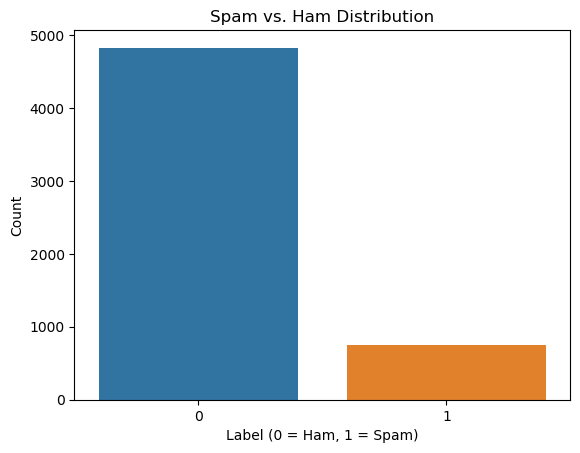

In [6]:
# Plot spam vs ham distribution
sns.countplot(x=df['label'])
plt.title("Spam vs. Ham Distribution")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()


In [7]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [8]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)


Accuracy: 0.9543
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.68      0.80       150

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



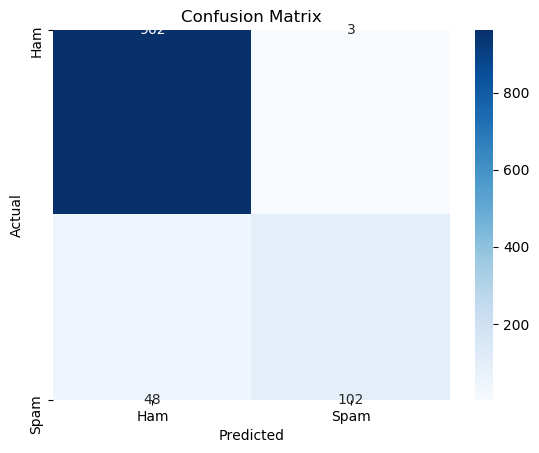

In [10]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
def predict_message(text):
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example predictions
sample_texts = ["Win a free iPhone! Click now!", "Hey, how are you doing today?"]
for text in sample_texts:
    print(f"Message: {text} --> Prediction: {predict_message(text)}")


Message: Win a free iPhone! Click now! --> Prediction: Spam
Message: Hey, how are you doing today? --> Prediction: Ham
